In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Cargar el archivo CSV
file_path = 'FP com 08-22 a 08-24.csv'  # Asegúrate de que el archivo CSV esté en el mismo directorio que tu notebook o proporciona la ruta completa
df = pd.read_csv(file_path, encoding='latin-1')

pd.options.display.float_format = '{:,.2f}'.format

In [68]:
# Diccionario para renombrar los ramos
ramos_dict = {
    1: "INCENDIO",
    2: "TRANSPORTE",
    3: "AERONAVEGACIÓN",
    4: "AUTOMOTORES",
    5: "CRISTALES",
    6: "ROBO",
    7: "RIESGOS VARIOS",
    8: "RESP. CIVIL",
    9: "SEGURO TÉCNICO",
    10: "RS. AGROPECUARIOS",
    12: "ACC. PERSONALES",
    13: "CAUCIÓN",
    17: "VIDA OBLIGATORIO",
    18: "VIDA COLECTIVO",
    19: "VIDA INDIVIDUAL",
    22: "CASCOS",
    24: "COMB FLIAR",
    25: "INDUSTRIA y COM.",
    35: "ACC. A PASAJEROS",
    36: "SEGURO DE SALUD",
    37: "SEGURO DE SEPELIO",
    44: "MOTOVEHÍCULOS",
    80: "ART"
}

# Reemplazar los números por nombres de ramos en la columna correspondiente
df[df.columns[8]] = df[df.columns[8]].map(ramos_dict)



# Filtrar el dataframe excluyendo ramos 12 (ACC. PERSONALES) y 19 (VIDA INDIVIDUAL)
df = df[~df[df.columns[8]].isin(["ACC. PERSONALES", "VIDA INDIVIDUAL"])]

# Diccionario para traducir meses en español a inglés
meses_espanol = {
    'ene': 'jan',
    'feb': 'feb',
    'mar': 'mar',
    'abr': 'apr',
    'may': 'may',
    'jun': 'jun',
    'jul': 'jul',
    'ago': 'aug',
    'sep': 'sep',
    'oct': 'oct',
    'nov': 'nov',
    'dic': 'dec'
}

# Reemplazar los meses en español por los meses en inglés en la columna 'Mes-Año'
df[df.columns[4]] = df[df.columns[4]].str[:3].replace(meses_espanol) + df[df.columns[4]].str[3:]



In [69]:
# Convertir la columna Mes-Año (columna 4) a tipo fecha usando el formato "%b-%y"
df[df.columns[4]] = pd.to_datetime(df[df.columns[4]], format='%b-%y', errors='coerce')

# Verificar si hay valores no convertidos (NaT)
if df[df.columns[4]].isnull().any():
    print("Algunos datos no se pudieron convertir a fecha. Revisa los valores no válidos:")
    print(df[df[df.columns[4]].isnull()])

# Preguntar al usuario si desea filtrar por un Productor
productor_input = input("Elige el productor (Ej. 26357, deja vacío para no filtrar): ")

# Variable para almacenar la parte fija del título
titulo_fijo = ""

# Verificar si se ingresa un número de productor y ajustar la parte fija del título
if productor_input.isdigit():
    # Filtrar el DataFrame por el productor especificado
    productor_input = int(productor_input)
    df = df[df[df.columns[24]] == productor_input]
    # Fijar la parte del título correspondiente al Productor
    titulo_fijo = f" PAS {productor_input}"
else:
    # Si no se ingresa un productor, se toma toda la organización
    titulo_fijo = " de toda la org."

# Parte variable del título para este gráfico específico
titulo_variable = "Evolución de Cobros Totales por Mes-Año"

# Concatenar la parte variable y fija para formar el título final
titulo_grafico = f"{titulo_variable} {titulo_fijo}"


Evolución por cobros totales (agrupados por Mes-año):
      Mes-año         Premio  % del total     Premio_num
1  2022-08-01  19,347,858.82         0.96  19,347,858.82
2  2022-09-01  21,146,842.72         1.05  21,146,842.72
3  2022-10-01  22,393,466.19         1.11  22,393,466.19
4  2022-11-01  24,983,887.77         1.23  24,983,887.77
5  2022-12-01  26,920,639.64         1.33  26,920,639.64
6  2023-01-01  29,020,293.97         1.43  29,020,293.97
7  2023-02-01  29,487,265.30         1.46  29,487,265.30
8  2023-03-01  33,836,970.20         1.67  33,836,970.20
9  2023-04-01  34,761,402.66         1.72  34,761,402.66
10 2023-05-01  37,874,430.40         1.87  37,874,430.40
11 2023-06-01  42,194,546.91         2.09  42,194,546.91
12 2023-07-01  47,837,031.43         2.36  47,837,031.43
13 2023-08-01  51,513,963.03         2.55  51,513,963.03
14 2023-09-01  57,750,705.42         2.85  57,750,705.42
15 2023-10-01  65,466,611.06         3.24  65,466,611.06
16 2023-11-01  74,400,894.07     

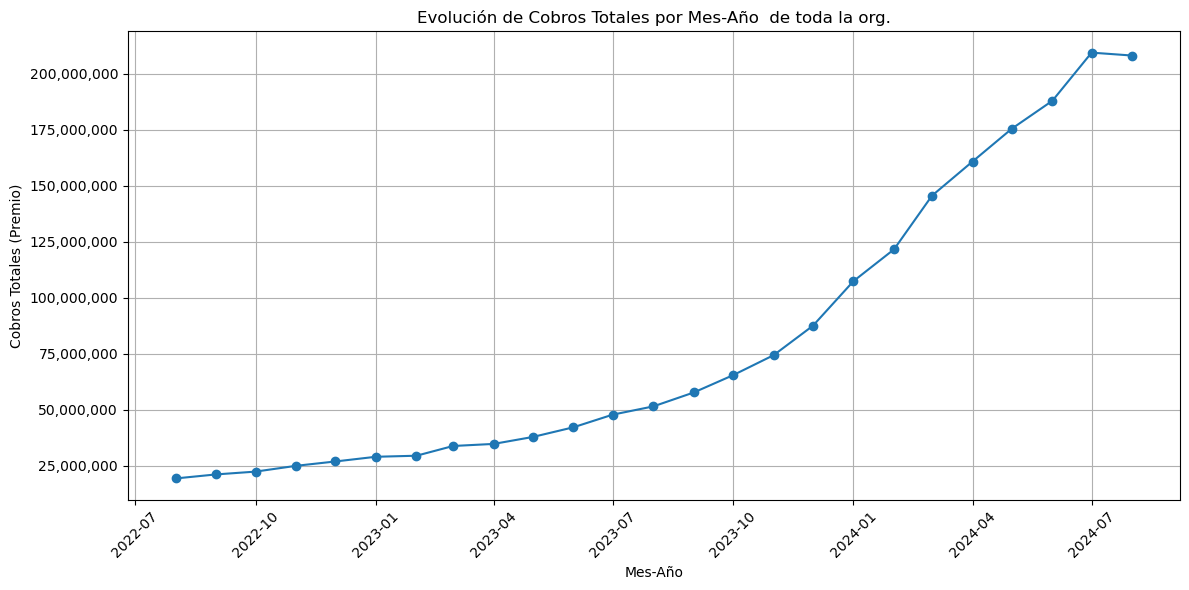

In [70]:
# 1. Evolución por cobros totales (sumatoria de Columna 19 Premio, agrupados por Columna 5 Mes-año)
evolucion_cobros = df.groupby(df.columns[4])[df.columns[18]].sum().reset_index()

# Crear un rango de fechas para el orden personalizado desde 08-22 hasta 08-24
fecha_inicio = pd.to_datetime("2022-08", format="%Y-%m")
fecha_fin = pd.to_datetime("2024-08", format="%Y-%m")
fechas_rango = pd.date_range(start=fecha_inicio, end=fecha_fin, freq='MS')

# Filtrar y ordenar el DataFrame por el rango de fechas
evolucion_cobros = evolucion_cobros[evolucion_cobros[df.columns[4]].isin(fechas_rango)].sort_values(by=df.columns[4])

# Calcular el porcentaje del total
evolucion_cobros['% del total'] = (evolucion_cobros[df.columns[18]] / evolucion_cobros[df.columns[18]].sum()) * 100

# Convertir el valor de "Premio" a número para graficar
evolucion_cobros['Premio_num'] = evolucion_cobros[df.columns[18]].replace({',': ''}, regex=True).astype(float)

# Función formateadora para números completos con separadores de miles
def format_num(num, pos):
    return '{:,.0f}'.format(num)

print("\nEvolución por cobros totales (agrupados por Mes-año):")
print(evolucion_cobros)

# Gráfico de líneas para la evolución de cobros totales
plt.figure(figsize=(12, 6))
plt.plot(evolucion_cobros[df.columns[4]], evolucion_cobros['Premio_num'], marker='o')
plt.title(titulo_grafico)  # Título dinámico con parte fija y variable
plt.xlabel('Mes-Año')
plt.ylabel('Cobros Totales (Premio)')
plt.xticks(rotation=45)

# Aplicar formato a los números del eje Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_num))

plt.grid(True)
plt.tight_layout()
plt.show()


Cantidad por ramo (conteo de pólizas únicas agrupadas por Ramo):
                 Ramo  Cantidad Polizas  % del total
2         AUTOMOTORES              8480        61.16
10        RESP. CIVIL              1517        10.94
13    SEGURO DE SALUD               835         6.02
5          COMB FLIAR               832         6.00
9       MOTOVEHÍCULOS               588         4.24
7            INCENDIO               371         2.68
12               ROBO               369         2.66
0    ACC. A PASAJEROS               208         1.50
11     RIESGOS VARIOS               175         1.26
8    INDUSTRIA y COM.               164         1.18
1                 ART               131         0.94
4             CAUCIÓN                77         0.56
14  SEGURO DE SEPELIO                41         0.30
15     SEGURO TÉCNICO                34         0.25
17     VIDA COLECTIVO                19         0.14
16         TRANSPORTE                17         0.12
6           CRISTALES            

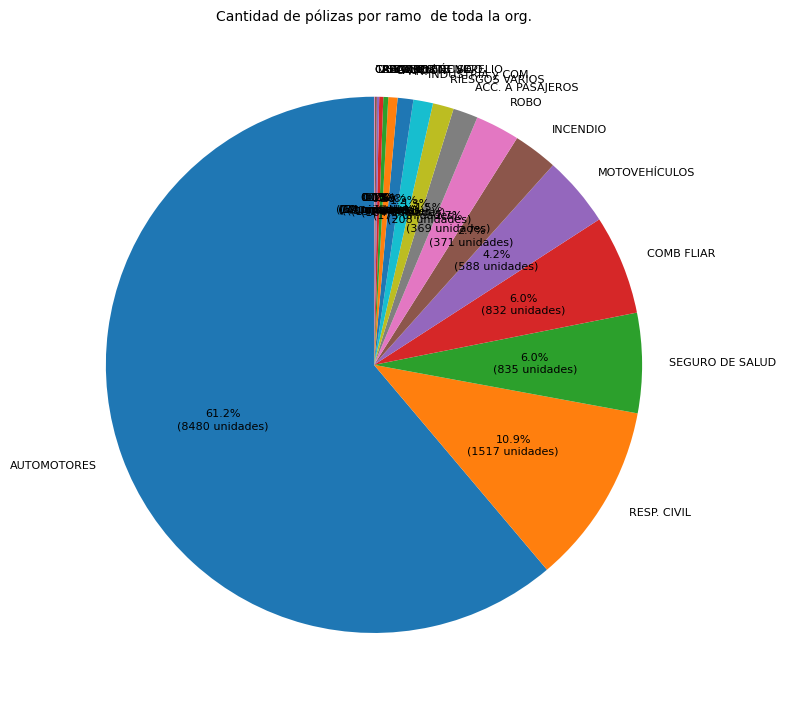

In [71]:
# Filtrar los casos en los que el "Premio" (Columna 19) sea mayor a 0
df_filtrado = df[df[df.columns[18]] > 0]

# 2. Cantidad por ramo (conteo de pólizas únicas en Columna 10 agrupados por Columna 9 Ramo)
cantidad_por_ramo = df_filtrado.groupby(df.columns[8])[df.columns[9]].nunique().reset_index()
cantidad_por_ramo.columns = [df.columns[8], 'Cantidad Polizas']
cantidad_por_ramo['% del total'] = (cantidad_por_ramo['Cantidad Polizas'] / cantidad_por_ramo['Cantidad Polizas'].sum()) * 100
cantidad_por_ramo = cantidad_por_ramo.sort_values(by='Cantidad Polizas', ascending=False)

print("\nCantidad por ramo (conteo de pólizas únicas agrupadas por Ramo):")
print(cantidad_por_ramo)

# Definir la parte variable y fija del título
titulo_variable = "Cantidad de pólizas por ramo"
# titulo_fijo debe haber sido definido anteriormente, por ejemplo, como:
# titulo_fijo = "& PAS {productor_input}"  # Esto es un ejemplo. Asegúrate de que la variable exista.
# Concatenar la parte variable y fija para formar el título final
titulo_grafico = f"{titulo_variable} {titulo_fijo}"

# Gráfico de torta para la cantidad por ramo
if not cantidad_por_ramo.empty:
    plt.figure(figsize=(8, 8))

    # Función para mostrar cantidad de pólizas y porcentaje en cada sector
    def autopct_format(pct, allvalues):
        absolute = int(round(pct / 100. * sum(allvalues)))
        return f"{pct:.1f}%\n({absolute} unidades)"  # Muestra porcentaje y cantidad de unidades

    # Crear el gráfico de torta
    plt.pie(
        cantidad_por_ramo['Cantidad Polizas'], 
        labels=cantidad_por_ramo[df.columns[8]], 
        autopct=lambda pct: autopct_format(pct, cantidad_por_ramo['Cantidad Polizas']), 
        startangle=90, 
        textprops={'fontsize': 8}  # Cambia el tamaño de letra
    )
    plt.title(titulo_grafico, fontsize=10)  # Título dinámico según el filtro aplicado
    plt.tight_layout()
    plt.show()

else:
    print("\nEl DataFrame cantidad_por_ramo está vacío. No se puede generar el gráfico.")


Cantidad por forma de pago (sumatoria agrupados por Origen Ingreso):
   Origen Ingreso            Premio  % del total
4            DEBI  1,126,410,259.31        50.77
11           PAGF    456,654,283.41        20.58
1            AJUS    146,787,307.85         6.62
13            PMC    108,113,336.37         4.87
0            AFIP     99,953,224.55         4.51
15           PROD     85,121,809.25         3.84
17           RAPI     72,584,991.71         3.27
8            LINK     40,062,753.57         1.81
7            EXPR     31,226,390.92         1.41
19           WEBS     20,837,717.11         0.94
6            DEVO     11,336,097.77         0.51
14           PNET      6,899,204.49         0.31
3             ART      4,212,678.65         0.19
18           RIPS      3,959,047.87         0.18
12           PLUS      1,770,332.32         0.08
10           PA24      1,688,436.83         0.08
5            DESC        396,058.04         0.02
9            MULT        344,781.13         0.02

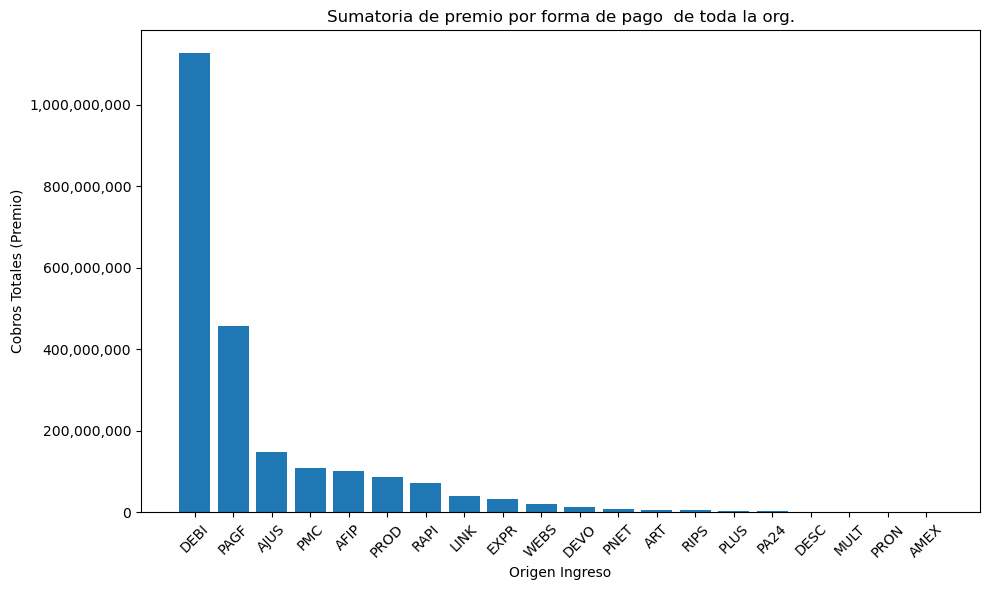

In [72]:
# Filtrar los casos en los que el "Premio" (Columna 19) sea mayor a 0
df_filtrado = df[df[df.columns[18]] > 0]

# Cantidad por forma de pago (sumatoria de Columna 19 Premio, agrupados por Columna 7 Origen Ingreso)
cantidad_por_forma_pago = df_filtrado.groupby(df.columns[6])[df.columns[18]].sum().reset_index()
cantidad_por_forma_pago['% del total'] = (cantidad_por_forma_pago[df.columns[18]] / cantidad_por_forma_pago[df.columns[18]].sum()) * 100

# Ordenar por "Premio" de mayor a menor
cantidad_por_forma_pago = cantidad_por_forma_pago.sort_values(by=df.columns[18], ascending=False)

# Formatear la columna "Premio" para mostrar con separador de miles y sin notación científica
cantidad_por_forma_pago[df.columns[18]] = cantidad_por_forma_pago[df.columns[18]].apply(lambda x: "{:,.2f}".format(x))

print("\nCantidad por forma de pago (sumatoria agrupados por Origen Ingreso):")
print(cantidad_por_forma_pago)

# Definir la parte variable del título
titulo_variable = "Sumatoria de premio por forma de pago"

# Asegúrate de que titulo_fijo esté definido previamente
# Por ejemplo, en el código principal antes de este bloque
# titulo_fijo = "& PAS {productor_input}" o titulo_fijo = "& de toda la org."

# Concatenar la parte variable y fija para formar el título final
titulo_grafico = f"{titulo_variable} {titulo_fijo}"

# Función formateadora para números completos con separadores de miles
def format_num(num, pos):
    return '{:,.0f}'.format(num)

# Gráfico de barras para la cantidad por forma de pago
plt.figure(figsize=(10, 6))
plt.bar(cantidad_por_forma_pago[df.columns[6]], cantidad_por_forma_pago[df.columns[18]].str.replace(',', '').astype(float))
plt.title(titulo_grafico)  # Título dinámico con parte fija y variable
plt.xlabel('Origen Ingreso')
plt.ylabel('Cobros Totales (Premio)')
plt.xticks(rotation=45)

# Aplicar formato a los números del eje Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_num))

plt.tight_layout()
plt.show()


Evolución de cantidad de pólizas COMB FLIAR por Mes-Año:
    Mes-Año  Cantidad Pólizas COMB FLIAR
0   2022-08                          158
1   2022-09                          163
2   2022-10                          170
3   2022-11                          167
4   2022-12                          171
5   2023-01                          175
6   2023-02                          178
7   2023-03                          181
8   2023-04                          186
9   2023-05                          195
10  2023-06                          206
11  2023-07                          228
12  2023-08                          249
13  2023-09                          240
14  2023-10                          244
15  2023-11                          248
16  2023-12                          246
17  2024-01                          258
18  2024-02                          244
19  2024-03                          251
20  2024-04                          255
21  2024-05                          248

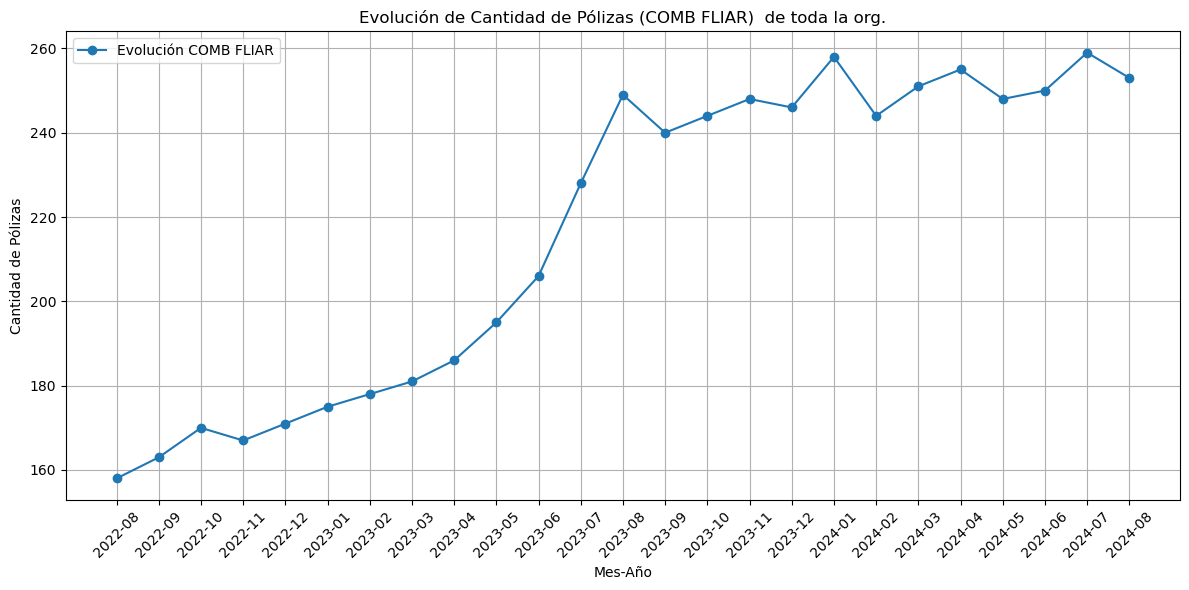

In [73]:
# Filtrar los casos en los que el "Premio" (Columna 19) sea mayor a 0 y el ramo sea "COMB FLIAR"
df_filtrado = df[(df[df.columns[18]] > 0) & (df[df.columns[8]] == "COMB FLIAR")].copy()

# Convertir la columna Mes-Año (columna 5) a tipo fecha para ordenación y luego extraer solo Mes-Año
df_filtrado[df.columns[4]] = pd.to_datetime(df_filtrado[df.columns[4]], format='%m-%Y', errors='coerce')
df_filtrado['Mes-Año'] = df_filtrado[df.columns[4]].dt.to_period('M')  # Extraer solo Mes y Año

# Verificar si hay valores NaT que no pudieron ser convertidos a fecha
if df_filtrado[df.columns[4]].isnull().any():
    print("Existen valores no convertidos a fecha. Revisar las siguientes filas:")
    print(df_filtrado[df_filtrado[df.columns[4]].isnull()])

# Eliminar duplicados por 'Poliza' y 'Mes-Año' para evitar contar la misma póliza más de una vez por mes
df_filtrado = df_filtrado.drop_duplicates(subset=[df.columns[9], 'Mes-Año'])

# Conteo de pólizas únicas por mes-año (solo "COMB FLIAR")
evolucion_comb_fliar = (
    df_filtrado
    .groupby('Mes-Año')[df.columns[9]]  # Agrupar por Mes-Año y contar pólizas únicas
    .count()
    .reset_index()
)
evolucion_comb_fliar.columns = ['Mes-Año', 'Cantidad Pólizas COMB FLIAR']

# Mostrar el reporte en consola
print("\nEvolución de cantidad de pólizas COMB FLIAR por Mes-Año:")
print(evolucion_comb_fliar)

# Revisar si hay algún valor inusualmente alto para investigar más a fondo
valores_altos = evolucion_comb_fliar[evolucion_comb_fliar['Cantidad Pólizas COMB FLIAR'] > evolucion_comb_fliar['Cantidad Pólizas COMB FLIAR'].mean() + 3*evolucion_comb_fliar['Cantidad Pólizas COMB FLIAR'].std()]
if not valores_altos.empty:
    print("\nValores inusualmente altos en el conteo de pólizas:")
    print(valores_altos)

# Definir la parte variable del título
titulo_variable = "Evolución de Cantidad de Pólizas (COMB FLIAR)"
# Concatenar la parte variable y fija del título
titulo_grafico = f"{titulo_variable} {titulo_fijo}"

# Crear el gráfico de líneas para la evolución de COMB FLIAR
plt.figure(figsize=(12, 6))

# Línea para la evolución de COMB FLIAR
plt.plot(
    evolucion_comb_fliar['Mes-Año'].astype(str),  # Convertir a string para que se vea correctamente en el gráfico
    evolucion_comb_fliar['Cantidad Pólizas COMB FLIAR'], 
    label='Evolución COMB FLIAR', 
    marker='o'
)

# Títulos y etiquetas
plt.title(titulo_grafico)  # Título dinámico con parte variable y fija
plt.xlabel('Mes-Año')
plt.ylabel('Cantidad de Pólizas')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


20 asegurados que pagan el premio más alto:
                                              Asegurado        Premio
2061                                 GUTTE JOSE ENRIQUE 15,258,001.41
2190                                   INTELEKTRON S.A.  9,110,240.68
4248                               TOUR VAN FULL S.R.L.  8,410,862.66
1320                               DISTRIBUIDORA GAS SA  8,063,736.65
2817                                      MFRUIT S.R.L.  7,962,989.61
3922                             SCHMIDT ROBERTO CARLOS  7,820,492.83
3439  QUILSA . COM. AR SH DE POZZI ALEJANDRO DANIEL ...  7,001,759.36
438                              BASILE NAHUEL JEREMIAS  6,774,277.94
2178                             INGENIERIA DABE S.R.L.  6,417,519.65
1255                           DI STASIO GUSTAVO MIGUEL  6,345,712.41
2152                                        IACONO JUAN  5,267,532.66
1114                                     COSTA LIBRE SA  4,958,121.84
2420                                        L

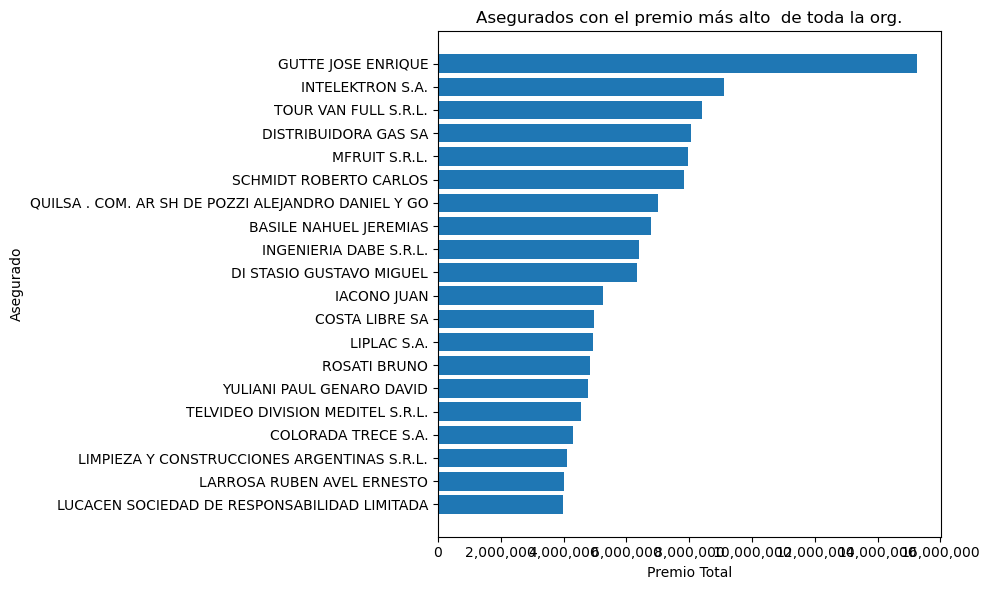

In [75]:
# 5. 20 asegurados que pagan el premio más alto, por sumatoria de pólizas
asegurados_premio_mas_alto = (
    df.groupby(df.columns[7])[df.columns[18]]
    .sum()
    .reset_index()
    .sort_values(by=df.columns[18], ascending=False)
    .head(20)
)

print("\n20 asegurados que pagan el premio más alto:")
print(asegurados_premio_mas_alto)

# Definir la parte variable y fija del título
titulo_variable = "Asegurados con el premio más alto"
# Asegúrate de que `titulo_fijo` esté definido previamente, por ejemplo:
# titulo_fijo = "& PAS {productor_input}"  # Según el productor filtrado
# titulo_fijo = "& de toda la org."  # Si es para toda la organización

# Concatenar la parte variable y fija para formar el título final
titulo_grafico = f"{titulo_variable} {titulo_fijo}"

# Función formateadora para números completos con separadores de miles
def format_num(num, pos):
    return '{:,.0f}'.format(num)

# Gráfico de barras horizontales para asegurados con el premio más alto
plt.figure(figsize=(10, 6))
plt.barh(asegurados_premio_mas_alto[df.columns[7]], asegurados_premio_mas_alto[df.columns[18]])
plt.title(titulo_grafico)  # Título dinámico con parte fija y variable
plt.ylabel('Asegurado')
plt.xlabel('Premio Total')

# Aplicar formato a los números del eje X para evitar la notación científica
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_num))

plt.gca().invert_yaxis()  # Invertir el eje Y para que el asegurado con el premio más alto esté arriba
plt.tight_layout()
plt.show()


20 asegurados que generan más comisión:
                            Asegurado  ComisiÃ³n cobranza
2061               GUTTE JOSE ENRIQUE          297,868.26
2190                 INTELEKTRON S.A.          214,605.27
4248             TOUR VAN FULL S.R.L.          200,299.92
3922           SCHMIDT ROBERTO CARLOS          186,177.38
1320             DISTRIBUIDORA GAS SA          184,367.70
438            BASILE NAHUEL JEREMIAS          164,126.59
1255         DI STASIO GUSTAVO MIGUEL          150,744.83
4500        YULIANI PAUL GENARO DAVID          121,909.75
3725                     ROSATI BRUNO          115,884.69
2328       LARROSA RUBEN AVEL ERNESTO          106,878.31
4202         TOMINICH MARCELO ORLANDO           99,793.76
2420                      LIPLAC S.A.           99,435.19
4525               ZARDIN MIRTA MABEL           91,402.14
944                   CHAMORRO JAVIER           89,016.84
1453            EVENTOS DISTINTOS SRL           87,100.19
1007   CIRCUS ENTERTAINMENT GRO

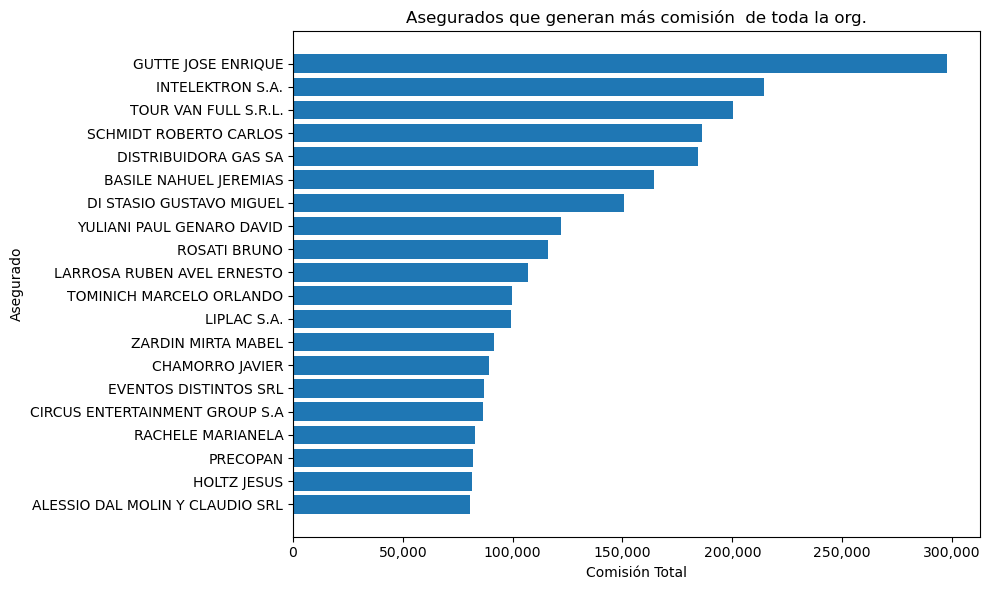

In [76]:
# 6. 20 asegurados que generan más comisión (por sumatoria de la columna 21 Comisión cobranza)
asegurados_mas_comision = (
    df.groupby(df.columns[7])[df.columns[20]]
    .sum()
    .reset_index()
    .sort_values(by=df.columns[20], ascending=False)
    .head(20)
)

print("\n20 asegurados que generan más comisión:")
print(asegurados_mas_comision)

# Definir la parte variable y fija del título
titulo_variable = "Asegurados que generan más comisión"
# Asegúrate de que `titulo_fijo` esté definido previamente, por ejemplo:
# titulo_fijo = "& PAS {productor_input}"  # Según el productor filtrado
# titulo_fijo = "& de toda la org."  # Si es para toda la organización

# Concatenar la parte variable y fija para formar el título final
titulo_grafico = f"{titulo_variable} {titulo_fijo}"

# Función formateadora para números completos con separadores de miles
def format_num(num, pos):
    return '{:,.0f}'.format(num)

# Gráfico de barras horizontales para asegurados con más comisión
plt.figure(figsize=(10, 6))
plt.barh(asegurados_mas_comision[df.columns[7]], asegurados_mas_comision[df.columns[20]])
plt.title(titulo_grafico)  # Título dinámico con parte fija y variable
plt.ylabel('Asegurado')
plt.xlabel('Comisión Total')

# Aplicar formato a los números del eje X para evitar la notación científica
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_num))

plt.gca().invert_yaxis()  # Invertir el eje Y para que el asegurado con más comisión esté arriba
plt.tight_layout()
plt.show()


Reporte de evolución de pólizas por Mes-Año:
    Mes-Año  Cantidad Pólizas Autos  Cantidad Pólizas Sin Autos
0   2022-07                    0.00                          63
1   2022-08                1,752.00                         957
2   2022-09                1,779.00                        1063
3   2022-10                1,803.00                        1096
4   2022-11                1,851.00                        1162
5   2022-12                1,901.00                        1210
6   2023-01                1,952.00                        1269
7   2023-02                1,954.00                        1295
8   2023-03                2,109.00                        1323
9   2023-04                2,139.00                        1352
10  2023-05                2,199.00                        1367
11  2023-06                2,258.00                        1347
12  2023-07                2,421.00                        1450
13  2023-08                2,473.00                       

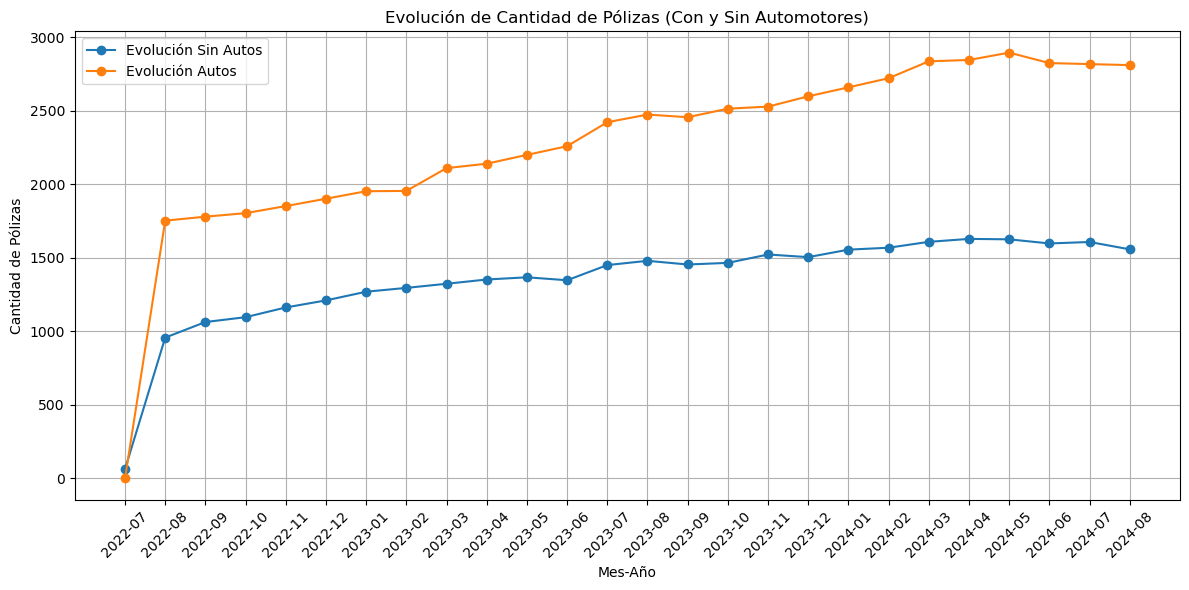

In [77]:
# 1. Filtrar los casos en los que el "Premio" (Columna 19) sea mayor a 0
df_filtrado = df[df[df.columns[18]] > 0].copy()  # Usar .copy() para evitar SettingWithCopyWarning

# 2. Convertir la columna Mes-Año (columna 5) a tipo fecha para ordenación y luego extraer solo Mes-Año
df_filtrado[df.columns[4]] = pd.to_datetime(df_filtrado[df.columns[4]], format='%d-%m-%Y', errors='coerce')
df_filtrado['Mes-Año'] = df_filtrado[df.columns[4]].dt.to_period('M')  # Extraer solo Mes y Año

# Verificar si hay valores NaT que no pudieron ser convertidos a fecha
if df_filtrado[df.columns[4]].isnull().any():
    print("Existen valores no convertidos a fecha. Revisar las siguientes filas:")
    print(df_filtrado[df_filtrado[df.columns[4]].isnull()])

# 3. Eliminar duplicados en la columna 'Poliza' para evitar contar pólizas repetidas en el mismo Mes-Año
df_filtrado = df_filtrado.drop_duplicates(subset=[df.columns[9], 'Mes-Año'])

# 4. Conteo de pólizas únicas por mes-año (sin Automotores, excluyendo Ramo "AUTOMOTORES")
evolucion_sin_autos = (
    df_filtrado[df_filtrado[df.columns[8]] != "AUTOMOTORES"]  # Excluir "AUTOMOTORES"
    .groupby('Mes-Año')[df.columns[9]]  # Agrupar por Mes-Año y contar pólizas
    .count()
    .reset_index()
)
evolucion_sin_autos.columns = ['Mes-Año', 'Cantidad Pólizas Sin Autos']

# 5. Conteo de pólizas únicas por mes-año (solo Automotores, Ramo "AUTOMOTORES")
evolucion_autos = (
    df_filtrado[df_filtrado[df.columns[8]] == "AUTOMOTORES"]  # Incluir solo "AUTOMOTORES"
    .groupby('Mes-Año')[df.columns[9]]  # Agrupar por Mes-Año y contar pólizas
    .count()
    .reset_index()
)
evolucion_autos.columns = ['Mes-Año', 'Cantidad Pólizas Autos']

# 6. Unir ambos DataFrames en un solo reporte por la columna 'Mes-Año'
reporte_evolucion = pd.merge(evolucion_autos, evolucion_sin_autos, on='Mes-Año', how='outer').fillna(0)

# 7. Mostrar el reporte en consola
print("\nReporte de evolución de pólizas por Mes-Año:")
print(reporte_evolucion)

# 8. Crear el gráfico de líneas con ambas evoluciones
plt.figure(figsize=(12, 6))

# Línea para la evolución sin autos
plt.plot(
    reporte_evolucion['Mes-Año'].astype(str),  # Convertir a string para que se vea correctamente en el gráfico
    reporte_evolucion['Cantidad Pólizas Sin Autos'], 
    label='Evolución Sin Autos', 
    marker='o'
)

# Línea para la evolución con autos
plt.plot(
    reporte_evolucion['Mes-Año'].astype(str), 
    reporte_evolucion['Cantidad Pólizas Autos'], 
    label='Evolución Autos', 
    marker='o'
)

# 9. Títulos y etiquetas
plt.title('Evolución de Cantidad de Pólizas (Con y Sin Automotores)')
plt.xlabel('Mes-Año')
plt.ylabel('Cantidad de Pólizas')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# 10. Mostrar el gráfico
plt.show()


In [78]:
# Filtrar los ramos específicos que mencionaste
ramos_interes = ["AUTOMOTORES", "COMB FLIAR", "INDUSTRIA y COM.", "ART"]
df = df[df[df.columns[8]].isin(ramos_interes)]

Valores únicos en la columna 'Mes-Año':
<DatetimeArray>
['2024-08-01 00:00:00', '2024-07-01 00:00:00', '2024-05-01 00:00:00',
 '2024-04-01 00:00:00', '2024-06-01 00:00:00', '2024-03-01 00:00:00',
 '2024-02-01 00:00:00', '2023-11-01 00:00:00', '2023-10-01 00:00:00',
 '2023-09-01 00:00:00', '2023-08-01 00:00:00', '2024-01-01 00:00:00',
 '2023-07-01 00:00:00', '2023-06-01 00:00:00', '2023-05-01 00:00:00',
 '2023-12-01 00:00:00', '2023-02-01 00:00:00', '2023-01-01 00:00:00',
 '2022-11-01 00:00:00', '2022-10-01 00:00:00', '2022-08-01 00:00:00',
 '2022-07-01 00:00:00', '2022-09-01 00:00:00', '2022-12-01 00:00:00',
 '2023-04-01 00:00:00', '2023-03-01 00:00:00']
Length: 26, dtype: datetime64[ns]


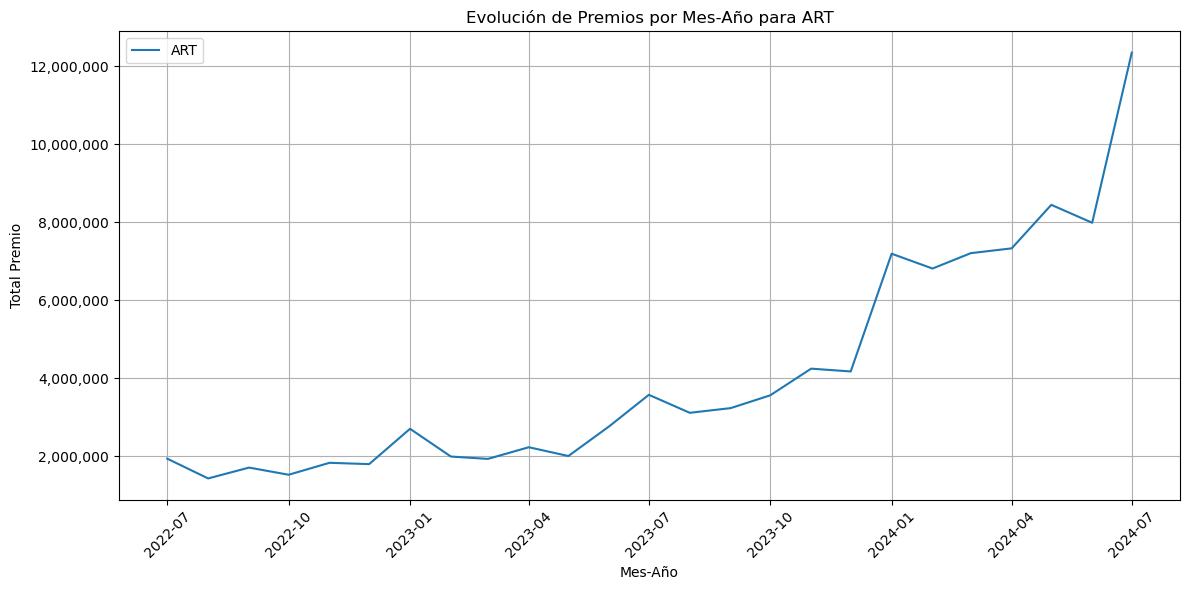

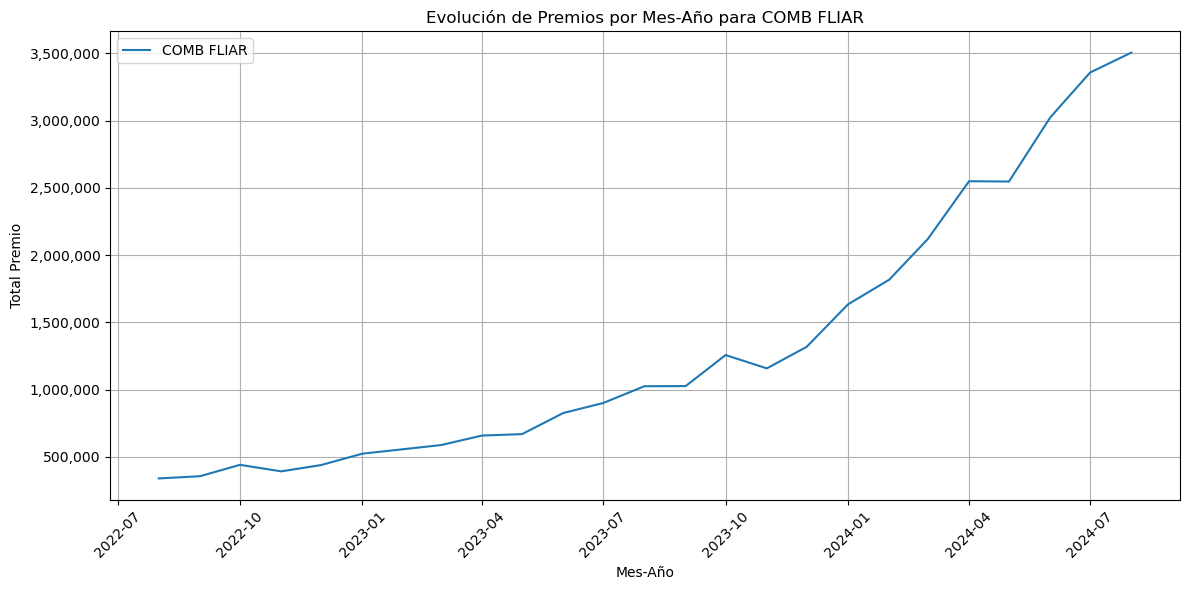

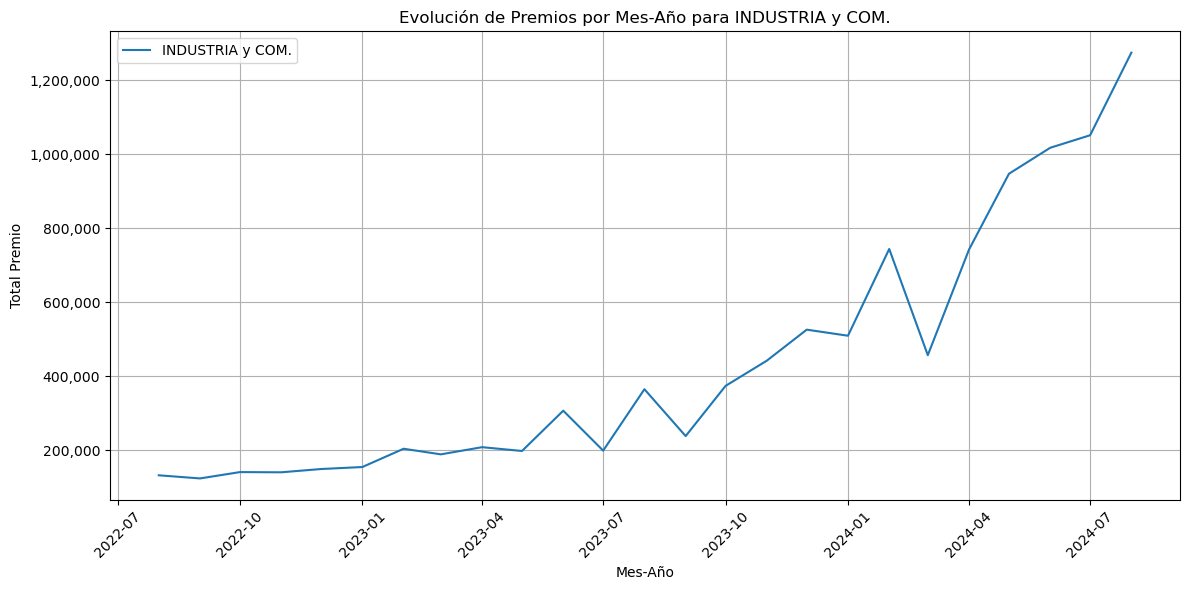

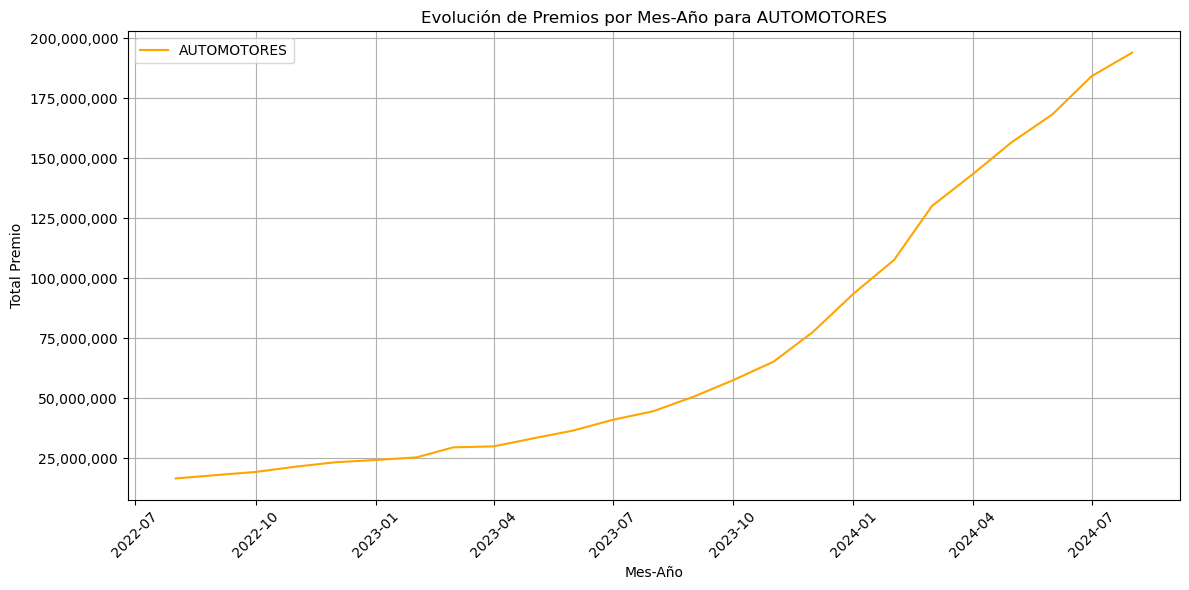

In [79]:
# Función formateadora para números completos con separadores de miles
def format_num(num, pos):
    return '{:,.0f}'.format(num)

# Verificar los valores únicos en la columna "Mes-Año" para identificar el formato
print("Valores únicos en la columna 'Mes-Año':")
print(df[df.columns[4]].unique())

# Intentar convertir la columna "Mes-Año" usando diferentes formatos
try:
    # Probar con formato '%m-%y' (ej: '08-22')
    df[df.columns[4]] = pd.to_datetime(df[df.columns[4]], format='%m-%y')
except ValueError:
    try:
        # Si falla, probar con formato '%m-%Y' (ej: '08-2022')
        df[df.columns[4]] = pd.to_datetime(df[df.columns[4]], format='%m-%Y')
    except ValueError:
        # Imprimir mensaje si ambos formatos fallan
        print("Error: El formato de fecha en la columna 'Mes-Año' no coincide con '%m-%y' ni '%m-%Y'. Verifica el formato de tus datos.")
        raise

# Evolución de premios por ramo y mes-año: suma de premios, agrupados por ramo y mes-año
evolucion_premios_ramo = df.groupby([df.columns[8], df.columns[4]])[df.columns[18]].sum().reset_index()
evolucion_premios_ramo.columns = ['Ramo', 'Mes-Año', 'Total Premio']

# Verificar si hay datos en evolucion_premios_ramo
if evolucion_premios_ramo.empty:
    print("No hay datos disponibles para generar gráficos.")
else:
    # Generar gráficos separados para cada ramo
    for ramo in evolucion_premios_ramo['Ramo'].unique():
        if ramo != "AUTOMOTORES":  # Evitar graficar el ramo AUTOMOTORES en esta parte
            plt.figure(figsize=(12, 6))
            data = evolucion_premios_ramo[evolucion_premios_ramo['Ramo'] == ramo].sort_values('Mes-Año')
            plt.plot(data['Mes-Año'], data['Total Premio'], label=ramo)
            plt.title(f'Evolución de Premios por Mes-Año para {ramo}')
            plt.xlabel('Mes-Año')
            plt.ylabel('Total Premio')
            plt.xticks(rotation=45)
            plt.legend()
            
            # Aplicar formato a los números del eje Y
            plt.gca().yaxis.set_major_formatter(FuncFormatter(format_num))
            
            plt.grid()
            plt.tight_layout()
            plt.show()

    # Gráfico específico para el ramo AUTOMOTORES
    plt.figure(figsize=(12, 6))
    data_auto = evolucion_premios_ramo[evolucion_premios_ramo['Ramo'] == "AUTOMOTORES"].sort_values('Mes-Año')
    plt.plot(data_auto['Mes-Año'], data_auto['Total Premio'], label='AUTOMOTORES', color='orange')
    plt.title('Evolución de Premios por Mes-Año para AUTOMOTORES')
    plt.xlabel('Mes-Año')
    plt.ylabel('Total Premio')
    plt.xticks(rotation=45)
    plt.legend()
    
    # Aplicar formato a los números del eje Y
    plt.gca().yaxis.set_major_formatter(FuncFormatter(format_num))
    
    plt.grid()
    plt.tight_layout()
    plt.show()

Valores únicos en la columna 'Mes-Año':
<DatetimeArray>
['2024-08-01 00:00:00', '2024-07-01 00:00:00', '2024-05-01 00:00:00',
 '2024-04-01 00:00:00', '2024-06-01 00:00:00', '2024-03-01 00:00:00',
 '2024-02-01 00:00:00', '2023-11-01 00:00:00', '2023-10-01 00:00:00',
 '2023-09-01 00:00:00', '2023-08-01 00:00:00', '2024-01-01 00:00:00',
 '2023-07-01 00:00:00', '2023-06-01 00:00:00', '2023-05-01 00:00:00',
 '2023-12-01 00:00:00', '2023-02-01 00:00:00', '2023-01-01 00:00:00',
 '2022-11-01 00:00:00', '2022-10-01 00:00:00', '2022-08-01 00:00:00',
 '2022-07-01 00:00:00', '2022-09-01 00:00:00', '2022-12-01 00:00:00',
 '2023-04-01 00:00:00', '2023-03-01 00:00:00']
Length: 26, dtype: datetime64[ns]


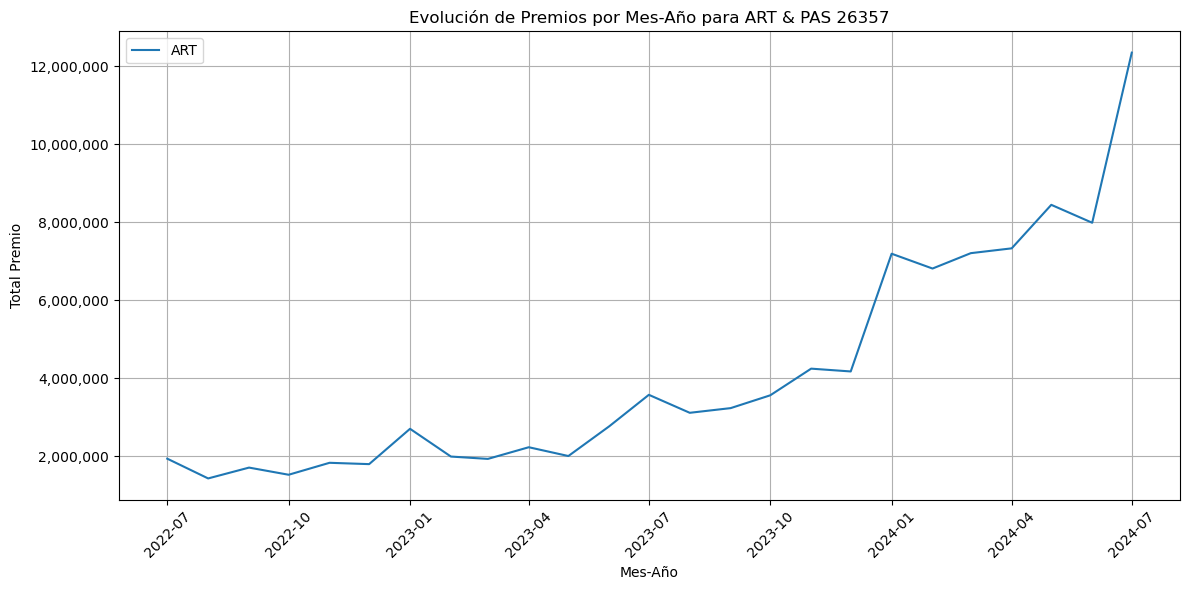

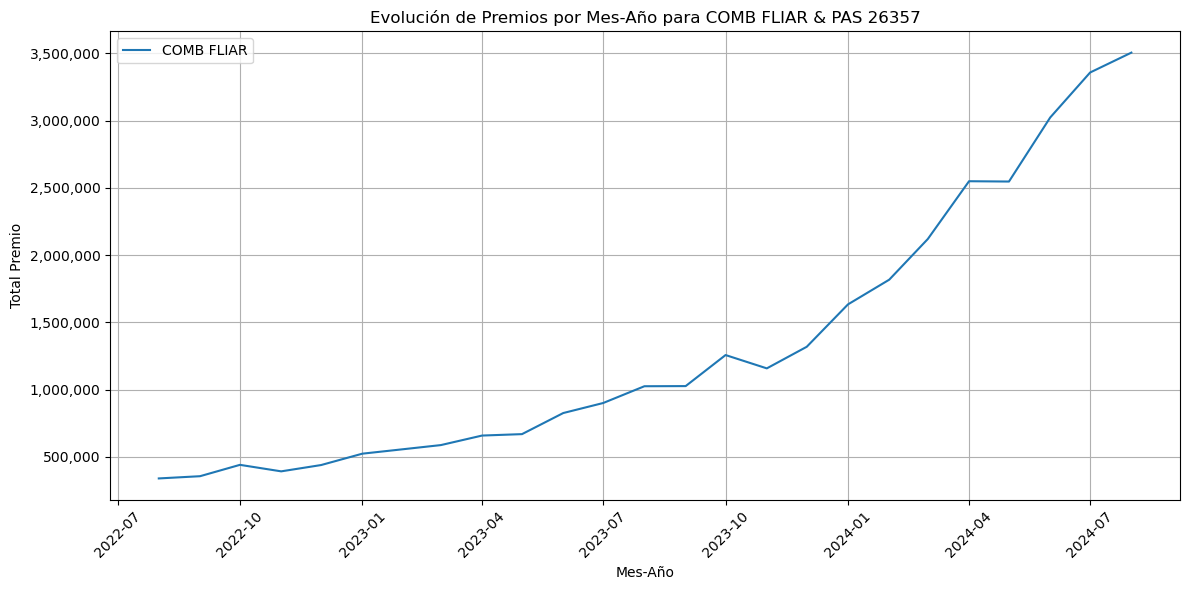

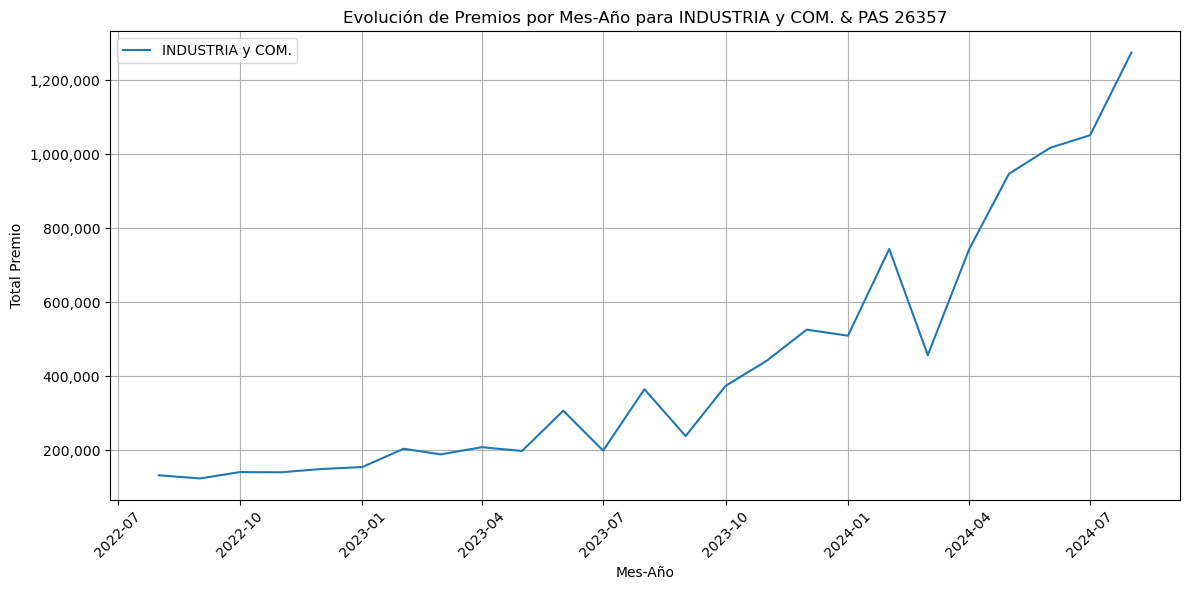

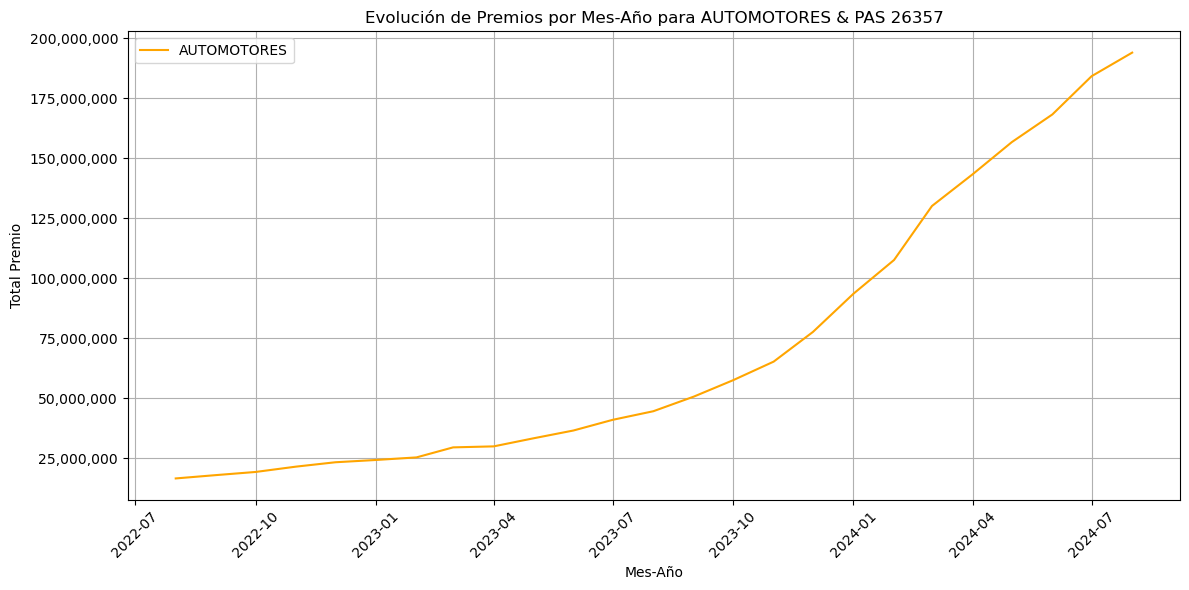

In [80]:
# Función formateadora para números completos con separadores de miles
def format_num(num, pos):
    return '{:,.0f}'.format(num)

# Verificar los valores únicos en la columna "Mes-Año" para identificar el formato
print("Valores únicos en la columna 'Mes-Año':")
print(df[df.columns[4]].unique())

# Intentar convertir la columna "Mes-Año" usando diferentes formatos
try:
    # Probar con formato '%m-%y' (ej: '08-22')
    df[df.columns[4]] = pd.to_datetime(df[df.columns[4]], format='%m-%y')
except ValueError:
    try:
        # Si falla, probar con formato '%m-%Y' (ej: '08-2022')
        df[df.columns[4]] = pd.to_datetime(df[df.columns[4]], format='%m-%Y')
    except ValueError:
        # Imprimir mensaje si ambos formatos fallan
        print("Error: El formato de fecha en la columna 'Mes-Año' no coincide con '%m-%y' ni '%m-%Y'. Verifica el formato de tus datos.")
        raise

# Evolución de premios por ramo y mes-año: suma de premios, agrupados por ramo y mes-año
evolucion_premios_ramo = df.groupby([df.columns[8], df.columns[4]])[df.columns[18]].sum().reset_index()
evolucion_premios_ramo.columns = ['Ramo', 'Mes-Año', 'Total Premio']

# Definir la parte fija del título
titulo_fijo = "& PAS 26357"  # Modificar según sea necesario

# Verificar si hay datos en evolucion_premios_ramo
if evolucion_premios_ramo.empty:
    print("No hay datos disponibles para generar gráficos.")
else:
    # Generar gráficos separados para cada ramo
    for ramo in evolucion_premios_ramo['Ramo'].unique():
        if ramo != "AUTOMOTORES":  # Evitar graficar el ramo AUTOMOTORES en esta parte
            plt.figure(figsize=(12, 6))
            data = evolucion_premios_ramo[evolucion_premios_ramo['Ramo'] == ramo].sort_values('Mes-Año')
            titulo_variable = f'Evolución de Premios por Mes-Año para {ramo}'
            plt.plot(data['Mes-Año'], data['Total Premio'], label=ramo)
            plt.title(f'{titulo_variable} {titulo_fijo}')
            plt.xlabel('Mes-Año')
            plt.ylabel('Total Premio')
            plt.xticks(rotation=45)
            plt.legend()
            
            # Aplicar formato a los números del eje Y
            plt.gca().yaxis.set_major_formatter(FuncFormatter(format_num))
            
            plt.grid()
            plt.tight_layout()
            plt.show()

    # Gráfico específico para el ramo AUTOMOTORES
    plt.figure(figsize=(12, 6))
    data_auto = evolucion_premios_ramo[evolucion_premios_ramo['Ramo'] == "AUTOMOTORES"].sort_values('Mes-Año')
    titulo_variable = 'Evolución de Premios por Mes-Año para AUTOMOTORES'
    plt.plot(data_auto['Mes-Año'], data_auto['Total Premio'], label='AUTOMOTORES', color='orange')
    plt.title(f'{titulo_variable} {titulo_fijo}')
    plt.xlabel('Mes-Año')
    plt.ylabel('Total Premio')
    plt.xticks(rotation=45)
    plt.legend()
    
    # Aplicar formato a los números del eje Y
    plt.gca().yaxis.set_major_formatter(FuncFormatter(format_num))
    
    plt.grid()
    plt.tight_layout()
    plt.show()


20 asegurados que pagan más premio:
                                              Asegurado        Premio
1758                                 GUTTE JOSE ENRIQUE 12,755,707.48
1875                                   INTELEKTRON S.A.  9,110,240.68
3617                               TOUR VAN FULL S.R.L.  8,410,862.66
2415                                      MFRUIT S.R.L.  7,962,989.61
1124                               DISTRIBUIDORA GAS SA  7,525,675.33
2940  QUILSA . COM. AR SH DE POZZI ALEJANDRO DANIEL ...  7,001,759.36
3343                             SCHMIDT ROBERTO CARLOS  6,927,799.67
383                              BASILE NAHUEL JEREMIAS  6,730,280.38
1865                             INGENIERIA DABE S.R.L.  6,417,519.65
1068                           DI STASIO GUSTAVO MIGUEL  6,327,497.03
1841                                        IACONO JUAN  5,267,532.66
954                                      COSTA LIBRE SA  4,958,121.84
3830                          YULIANI PAUL GENARO DAV

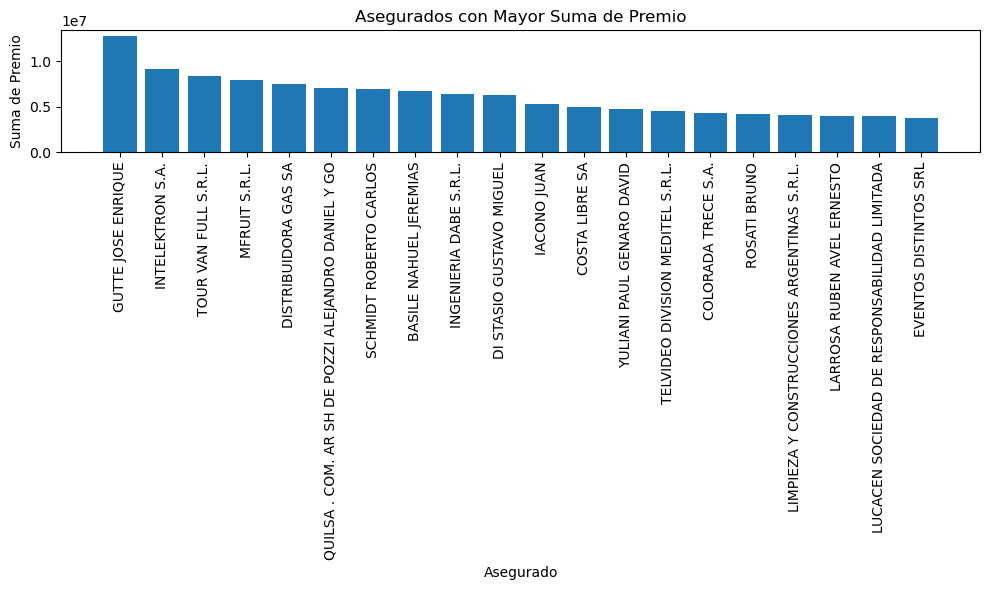

In [81]:
# 20 asegurados que pagan más premio (20 asegurados de Columna 8 Asegurado - que pagan más premio en Columna 19 Premio)
asegurados_mas_premio = df.groupby(df.columns[7])[df.columns[18]].sum().reset_index().sort_values(by=df.columns[18], ascending=False).head(20)
print("\n20 asegurados que pagan más premio:")
print(asegurados_mas_premio)

# Gráfico de barras para los asegurados con más premio
plt.figure(figsize=(10,6))
plt.bar(asegurados_mas_premio[df.columns[7]], asegurados_mas_premio[df.columns[18]])
plt.title('Asegurados con Mayor Suma de Premio')
plt.xlabel('Asegurado')
plt.ylabel('Suma de Premio')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
